In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import numpy as np
%matplotlib inline

## a) Reading data

In [2]:
labeled_images = pd.read_csv('./data/train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]

In [3]:
images.shape

(5000, 784)

## b) Display an MNIST digit

In [4]:
def display_image_at(i, images, labels):
    img = images.iloc[i].as_matrix()
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(labels.iloc[i,0])

### Display one of each digit

In [5]:
def search_image_index(n):
    if(n < 0 or n > 9):
        print("Data not available")
    for i in range(0,len(labels)):
        if(n == labels.iloc[i,0]):
            return i

def show_digit(n):
    display_image_at(search_image_index(n), images, labels)

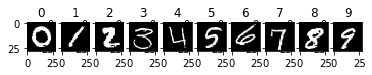

In [6]:
index = 0
while(index < 10):
    plt.subplot(1,10,index+1)
    show_digit(index)
    index = index + 1

## c) 

### Prior Probability

In [7]:
count_arr = [0] * 10
for i in range(0,len(labels)): 
    count_arr[labels.iloc[i,0]] = count_arr[labels.iloc[i,0]] + 1;

for i in range(0,10):
    print(i,": ",(count_arr[i]/len(labels)))


0 :  0.0988
1 :  0.1116
2 :  0.109
3 :  0.096
4 :  0.0954
5 :  0.0938
6 :  0.1032
7 :  0.1012
8 :  0.0954
9 :  0.0956


### As the hist shows, the digits are uniform distributed. 
### It's also even since the frequencies of labels are rouhgly equal.

### Display a normalized hist

(array([ 0.54888889,  0.        ,  0.        ,  0.        ,  0.        ,
         0.62      ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.60555556,  0.        ,  0.        ,  0.        ,
         0.        ,  0.53333333,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.53      ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.52111111,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.57333333,  0.        ,
         0.        ,  0.        ,  0.        ,  0.56222222,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.53      ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.53111111]),
 array([ 0.  ,  0.18,  0.36,  0.54,  0.72,  0.9 ,  1.08,  1.26,  1.44,
         1.62,  1.8 ,  1.98,  2.16,  2.34,  2.52,  2.7 ,  2.88,  3.06,
         3.24,  3.42,  3.6 ,  3.78,  3.96,  4.14,  4.32,  4.5 ,  4.68,
         4.86,  5.04,  5.22,  5.4 ,  5.58,  5.76,  5.94

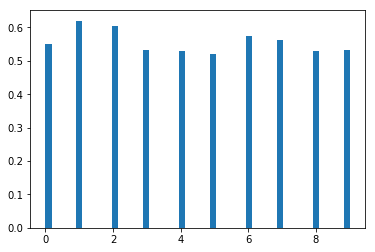

In [8]:
plt.hist(labels['label'], 50, normed=1)

## d) Find neighbor and print

In [9]:
def display_image_with_comp(i, images, labels, n):
    img = images.iloc[i].as_matrix()
    img = img.reshape((28,28))

    if labels.iloc[i,0] != n:
        plt.text(24,24,'*',fontsize=8,bbox=dict(facecolor='red', alpha=1))

    plt.imshow(img,cmap='gray')
    plt.title(labels.iloc[i,0])

In [10]:
def nearest_neighbor(n):
    image_index = search_image_index(n)
    plt.subplot(2,1,1)
    display_image_at(image_index, images, labels)
    
    inX = images.iloc[image_index]
    np_inX = inX.as_matrix()
    
    images_wo_x = images.copy()
    images_wo_x.drop(image_index, inplace=True)
    np_images_wo_x = images_wo_x.as_matrix()
    
    labels_wo_x = labels.copy()
    labels_wo_x.drop(image_index, inplace=True)
    np_labels_wo_x = labels_wo_x.as_matrix()
    
    # Calculate distance to each pixels from inX to images
    imagesSize = np_images_wo_x.shape[0]
    diffMat = np.tile(np_inX, (imagesSize,1)) - np_images_wo_x
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistanceIndicies = distances.argsort()
    
    plt.subplot(2,1,2)
    display_image_with_comp(sortedDistanceIndicies[0], images_wo_x, labels_wo_x, n)
    

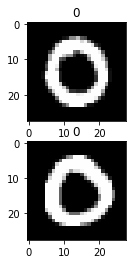

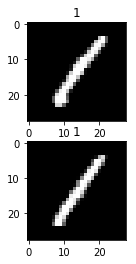

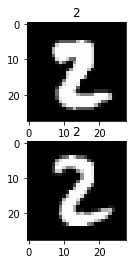

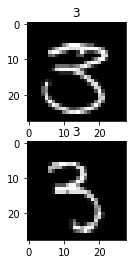

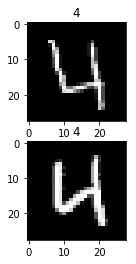

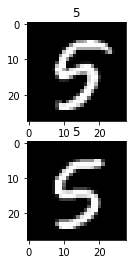

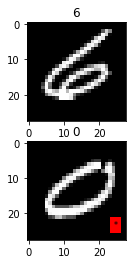

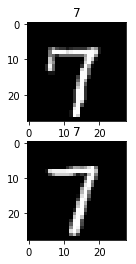

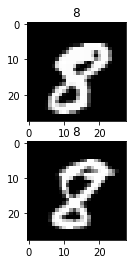

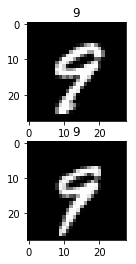

In [11]:
for i in range(10):
    plt.subplots(2,10)
    nearest_neighbor(i)

## e) 0 and 1 binary comparision

In [12]:
zero_idx = []
one_idx = []

for idx,val in enumerate(labels.as_matrix()):
    if val == 0:
        zero_idx.append(idx)
    elif val == 1:
        one_idx.append(idx)

In [13]:
zero_images = images.iloc[zero_idx]
one_images = images.iloc[one_idx]

In [14]:
from sklearn.metrics import pairwise_distances

In [15]:
zero_one = pairwise_distances(zero_images,one_images, metric='euclidean')
one_zero = pairwise_distances(one_images,zero_images, metric='euclidean')
zero_zero = pairwise_distances(zero_images,zero_images, metric='euclidean')
one_one = pairwise_distances(one_images,one_images, metric='euclidean')

In [16]:
genuine = np.append(zero_zero.reshape((zero_zero.size,1)), one_one.reshape((one_one.size,1)))
imposter = np.append(zero_one.reshape((zero_one.size,1)), one_zero.reshape((one_zero.size,1)))

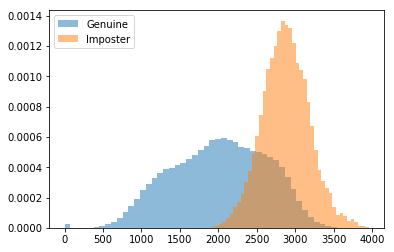

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(genuine, 50, alpha=0.5, label='Genuine', normed=True)
ax1.hist(imposter, 50, alpha=0.5, label='Imposter', normed=True)
plt.legend(loc='upper left')
plt.savefig("Binary Comparision")
plt.show()

## f) ROC curve

In [43]:
minDistance = min(min(genuine),min(imposter))
maxDistance = max(max(genuine), max(imposter))


In [45]:
TPR_values = []
FPR_values = []

for threshold in range(int(minDistance), int(maxDistance)):
    TP = len([i for i,x in enumerate(genuine) if x < threshold])
    TPR = TP / len(genuine)
    TPR_values.append(TPR)

    FP = len([i for i,x in enumerate(imposter) if x < threshold])
    FPR = FP / len(imposter)
    FPR_values.append(FPR)


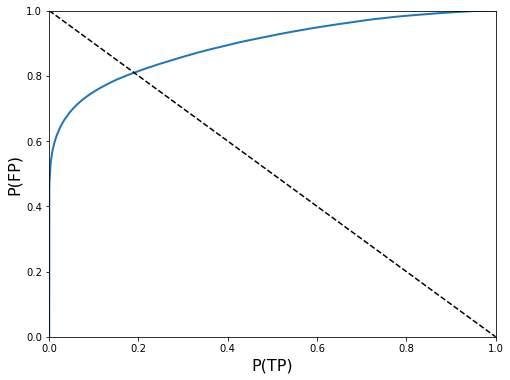

In [46]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [1, 0], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('P(TP)', fontsize=16)
    plt.ylabel('P(FP)', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(FPR_values, TPR_values)
plt.savefig("roc_curve_plot")
plt.show()

### The EER is at (0.2, 0.8)

### The EER when guessing randomly in this case is 50% (0 or 1 result)

## g) KNN Implementation

In [48]:
import operator

def kNN(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances =  sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndices = distances.argsort()
    
    classCount = {}
    for i in range(k):
        voteIlabel = labels.item(sortedDistIndices[i])
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

    sortedClassCount = sorted(classCount.items(), 
                              key=operator.itemgetter(1), 
                              reverse=True)
    return sortedClassCount[0][0]

In [49]:
inX = images.iloc[0]
dataSet = images.iloc[1:50,0:]
labelSet = labels.iloc[1:50,0:]

In [83]:
print("Expected: ",labels.iloc[0,0])
result = kNN(inX.as_matrix(), dataSet.as_matrix(), labelSet.as_matrix(), 3)
print("Actual: ",result)

Expected:  1
Actual:  1


## h) 3 fold cross-validation

In [170]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def kNNkFoldCV(dataSet, labelSet, k):
    skfolds = StratifiedKFold(n_splits = k, random_state=42)
    
    X_train = dataSet.as_matrix()
    y_train = (labelSet.as_matrix()).reshape(labelSet.shape[0],)
    result = []
    y_predict = []
    y_data = []
    
    for train_index, test_index in skfolds.split(X_train, y_train):
        X_train_folds = X_train[train_index]
        y_train_folds = (y_train[train_index])
        X_test_fold = X_train[test_index]
        y_test_fold = (y_train[test_index])

        y_pred = []
        n_correct = 0
        for i,x in enumerate(X_test_fold):
            y = kNN(x, X_train_folds, y_train_folds, 5)
            y_pred.append(y)
            y_predict.append(y)
            y_data.append(y_test_fold[i])
            if y == y_test_fold[i]:
                n_correct += 1
        
        result.append(n_correct/len(y_pred))
    
    return result,y_predict,y_data

In [171]:
kNN_Scores, y_predict, y_data = kNNkFoldCV(images, labels, 3)

In [172]:
sum = 0
for score in kNN_Scores:
    sum += score

print("Scores: ", kNN_Scores)
print("Average score: ", sum/len(kNN_Scores))


Scores:  [0.9652956298200515, 0.9643520502928989, 0.9666380911558794]
Average score:  0.9654285904229433


## i) Generate Confusion Matrix 10x10

In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_data, y_predict)

array([[4102,    1,    4,    0,    0,    6,   13,    3,    1,    2],
       [   0, 4657,    9,    1,    1,    1,    3,    8,    1,    3],
       [  30,   55, 3964,   16,    3,    4,    4,   85,   11,    5],
       [   3,   11,   26, 4186,    0,   48,    3,   27,   27,   20],
       [   2,   49,    0,    0, 3898,    0,   16,    8,    2,   97],
       [  10,    5,    1,   62,    3, 3628,   50,    5,    6,   25],
       [  21,    7,    1,    0,    4,   18, 4085,    0,    1,    0],
       [   2,   59,   11,    3,   11,    0,    0, 4267,    0,   48],
       [  14,   47,   14,   64,   14,   63,   20,   13, 3764,   50],
       [  14,    9,    3,   31,   42,   11,    2,   66,   13, 3997]])

###  Which digits are tricky to classify?

As we can see from the confusion matrix, number 8 is the most tricky since it has the highest count of mapping to wrong number (~270). 

## j) Train

In [291]:
test_labeled_images = pd.read_csv('./data/test.csv')
test_images = test_labeled_images.iloc[0:,1:]
test_labels = test_labeled_images.iloc[0:,:1]

In [293]:
test_labeled_images

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
arr = []
for i,img in test_labeled_images.iterrows():
    y = kNN(img.as_matrix(), images.as_matrix(), labels.as_matrix(), 10)
    arr.append([i,y])

In [296]:
df_result = pd.DataFrame.from_records(arr, columns=["ImageId","Label"])

In [297]:
df_result.to_csv("kaggle_digit_reg.csv", index=False)